C:\Users\earth\AppData\Local\Temp\ipykernel_15764\3405174402.py:53: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  center_point.set_data(center_x, center_y)


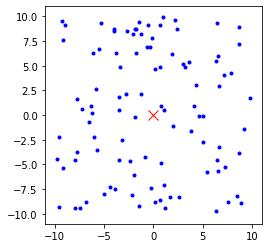

In [5]:
import random
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# 個体数
num_individuals = 100

# 中心点の座標
center_x, center_y = 0, 0

# 移動範囲の半径
radius = 10

# 個体の初期位置
positions = [(random.uniform(-radius, radius), random.uniform(-radius, radius)) for _ in range(num_individuals)]

# シミュレーションのステップ数
num_steps = 100

# グラフの設定
fig, ax = plt.subplots()
ax.set_xlim(-radius - 1, radius + 1)
ax.set_ylim(-radius - 1, radius + 1)
ax.set_aspect('equal')

# プロットオブジェクトの初期化
particles, = ax.plot([], [], 'bo', ms=3)
center_point, = ax.plot([], [], 'rx', ms=10)

# アニメーション関数
def animate(frame):
    # 各個体の移動
    for i in range(num_individuals):
        # ランダムな方向と距離を決める
        angle = random.uniform(0, 2 * math.pi)
        distance = random.uniform(0, 1)
        
        # 新しい位置を計算
        new_x = positions[i][0] + distance * math.cos(angle)
        new_y = positions[i][1] + distance * math.sin(angle)
        
        # 移動範囲を超えないようにする
        if ((new_x - center_x)**2 + (new_y - center_y)**2) > radius**2:
            continue
        
        # 位置を更新
        positions[i] = (new_x, new_y)
    
    # プロットデータを更新
    x_coords, y_coords = zip(*positions)
    particles.set_data(x_coords, y_coords)
    center_point.set_data(center_x, center_y)
    
    return particles, center_point

# アニメーションを作成
ani = animation.FuncAnimation(fig, animate, frames=num_steps, interval=50, blit=True)

plt.show()